[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_05/blob/master/W05_CCS_Coding_Challenge_3.ipynb)

## Coding Challenge #3

In this coding challenge, we will use Spearman's Rank to find the correlation between **categorical, non-linearly related and non-normally distributed variables**. You will gain exposure to 2 key concepts:

1) Spearman's Rank Correlation

2) Chi-Square tables (The Chi-Square method was covered in the "Goodness Of Fit" module. As a pre-requisite to this coding challenge, that module should be reviewed to understand the Chi-Square method)

As a guideline:

If the p-value is < 0.05 then you reject the null hypothesis and conclude that the variables are **correlated**

If the p-value is > 0.05 then you accept the null hypothesis and conclude that the variables are **independent**

When computing Spearman's Rank Correlation, you have to ensure the following:

a) The variables/attributes are numeric and able to be bucketed into categories

b) The variables are related non-lineraly

c) The variables are non-normally distibuted


Given this background on Spearman's Rank Correlation, there are 3 main objectives you need to accomplish:

1) Construct a Scatter Plot of cyl versus am, gear and carb (i.e. 3 different scatter plots) to verify that the variables are related non-lineraly and and are not-normally distributed. *A visual examination of the data proves that cycl, am, gear and carb are numeric variables that can be placed in categories.*

2) Compute the Spearman's Rank Correlation Coefficient

3) Conduct the Chi-Square test to ascertain how the 'cyl' variable is related to am, gear and carb


**Dataset to be used**: mtcars dataset that we have used in one of the previous sessions. The dataset is accessible via the following link:

https://gist.github.com/seankross/a412dfbd88b3db70b74b






### Spearman correlation!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the spearmanr from scipy
import scipy
from scipy.stats import spearmanr

cars_DataFrame = pd.read_csv('https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1')
cars_DataFrame = cars_DataFrame.rename(columns = {'Unnamed: 0':'car_name'})

print(cars_DataFrame.head())

            car_name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


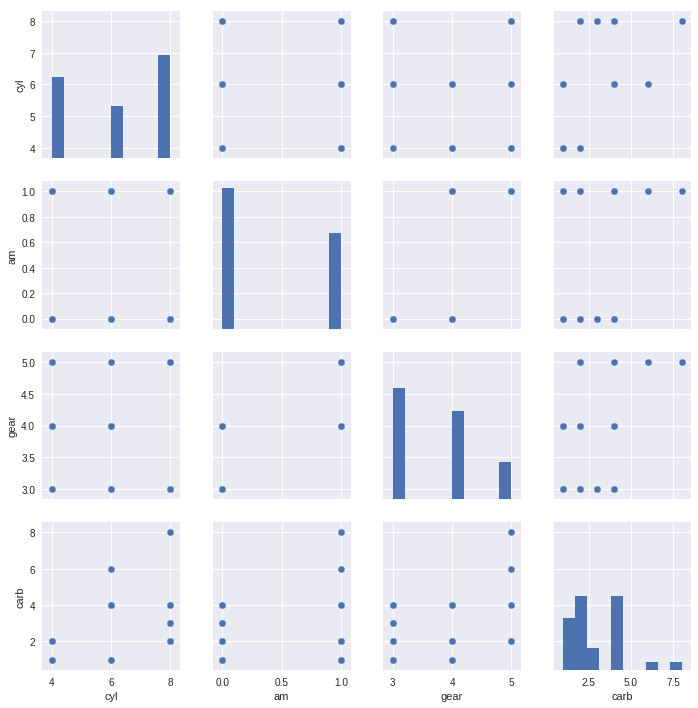

In [4]:
re_df = cars_DataFrame[['cyl', 'am', 'gear', 'carb']]
sns.pairplot(re_df)


In [10]:
car_cylinder = re_df['cyl']
car_trans = re_df['am']
car_gear = re_df['gear']
car_carb = re_df['carb']

results = spearmanr(car_cylinder, car_trans)
print(results)
print(np.corrcoef(car_cylinder,car_trans))
results = spearmanr(car_cylinder, car_gear)
print(results)
print(np.corrcoef(car_cylinder,car_gear))
results = spearmanr(car_cylinder, car_carb)
print(results)
print(np.corrcoef(car_cylinder,car_carb))
print(np.corrcoef(car_cylinder,[car_trans,car_gear,car_carb]))

SpearmanrResult(correlation=-0.5220711818077188, pvalue=0.0021780464381859484)
[[ 1.         -0.52260705]
 [-0.52260705  1.        ]]
SpearmanrResult(correlation=-0.5643104747017164, pvalue=0.0007678208835711609)
[[ 1.        -0.4926866]
 [-0.4926866  1.       ]]
SpearmanrResult(correlation=0.580067978775226, pvalue=0.0005016643211749825)
[[1.         0.52698829]
 [0.52698829 1.        ]]
[[ 1.         -0.52260705 -0.4926866   0.52698829]
 [-0.52260705  1.          0.79405876  0.05753435]
 [-0.4926866   0.79405876  1.          0.27407284]
 [ 0.52698829  0.05753435  0.27407284  1.        ]]


In [27]:
from scipy.stats import chi2_contingency

crosstab_table = pd.crosstab(car_cylinder, car_trans)

crosstab_table = pd.crosstab(car_cylinder,car_gear)
print(crosstab_table)

chi2, p, dof, expected = chi2_contingency(crosstab_table.values)
print(chi2)
print(p)
print(dof)
print(expected)

gear   3  4  5
cyl           
4      1  8  2
6      2  4  1
8     12  0  2
18.03636363636364
0.0012140660337851554
4
[[5.15625 4.125   1.71875]
 [3.28125 2.625   1.09375]
 [6.5625  5.25    2.1875 ]]


In [28]:
crosstab_table = pd.crosstab(car_cylinder,car_trans)
print(crosstab_table)

chi2, p, dof, expected = chi2_contingency(crosstab_table.values)
print(chi2)
print(p)
print(dof)
print(expected)

am    0  1
cyl       
4     3  8
6     4  3
8    12  2
8.740732951259268
0.012646605046107276
2
[[6.53125 4.46875]
 [4.15625 2.84375]
 [8.3125  5.6875 ]]


In [29]:
crosstab_table = pd.crosstab(car_cylinder,car_carb)
print(crosstab_table)

chi2, p, dof, expected = chi2_contingency(crosstab_table.values)
print(chi2)
print(p)
print(dof)
print(expected)

carb  1  2  3  4  6  8
cyl                   
4     5  6  0  0  0  0
6     2  0  0  4  1  0
8     0  4  3  6  0  1
24.38886827458256
0.006632477762992059
10
[[2.40625 3.4375  1.03125 3.4375  0.34375 0.34375]
 [1.53125 2.1875  0.65625 2.1875  0.21875 0.21875]
 [3.0625  4.375   1.3125  4.375   0.4375  0.4375 ]]
